## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [10] : [Hierarchical Clustering] </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [19]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Fernando Khorasani"
myNIM = "43088"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Fernando Khorasani
NIM: 		43088
Start: 		2022-11-17 13:45:18.100213
Device ID: 	66269d95-6643-11ed-8e49-5405db3707d4



---

### Dataset yang dipakai:

1. [Mall Customer Segmentation Data] – sumber : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python = tentang data pelanggan dari mall
2. [Banknote Authentication DataSet] – sumber : https://archive.ics.uci.edu/ml/datasets/banknote+authentication# = data dari gambar uang kertas dan uang palsu

### Hasil kerja

In [20]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize

In [21]:
## Import Dataset Pertama
dataset1 = pd.read_csv('Mall_Customers.csv')
dataset1.drop(columns=dataset1.columns[0], axis=1, inplace=True)
dataset1.shape

(200, 4)

In [22]:
dataset1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [23]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [24]:
dataset1.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [25]:
dataset1.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

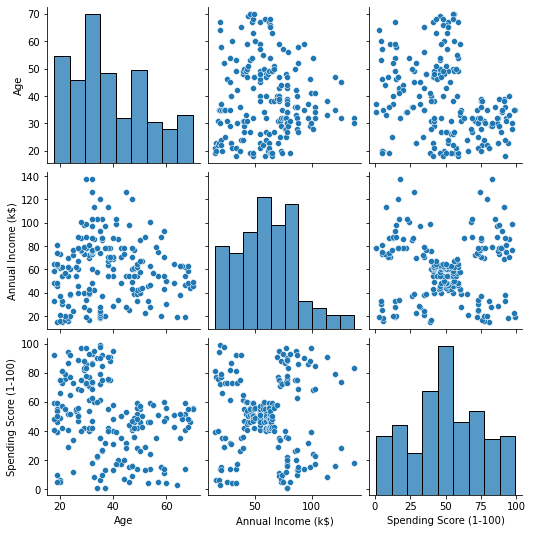

In [26]:
sns.pairplot(dataset1)

In [27]:
col = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

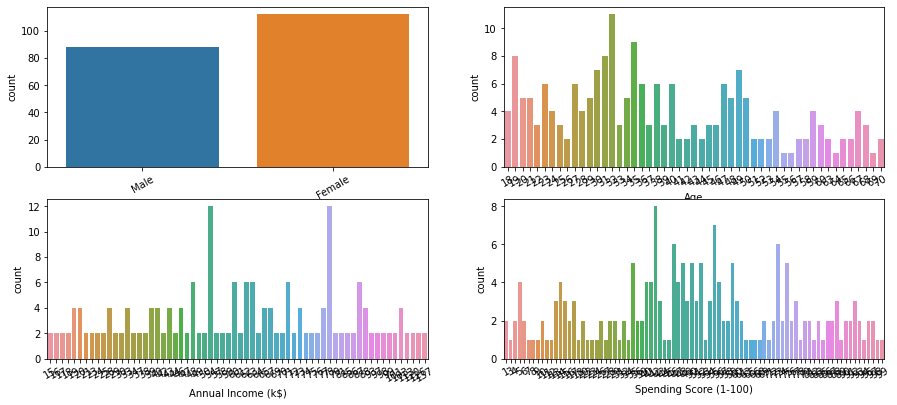

In [28]:
fig = plt.figure(figsize = (15, 10))
axes = 320

for num in col:
  axes += 1
  fig.add_subplot(axes)
  sns.countplot(data=dataset1, x=num)
  plt.xticks(rotation=30)

plt.show()

<AxesSubplot:>

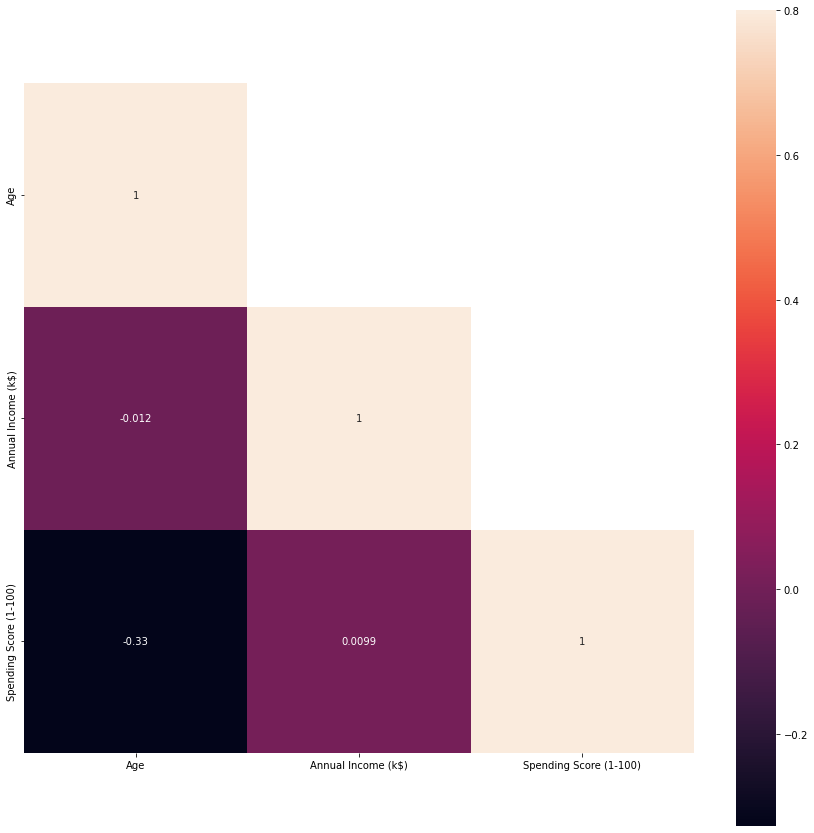

In [29]:
#create correlation
corr = dataset1.corr(method = 'pearson')
#convert correlation to numpy array
mask = np.array(corr)

#to mask the reperirive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize=(15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask=mask, vmax=0.8, square=True, annot=True)

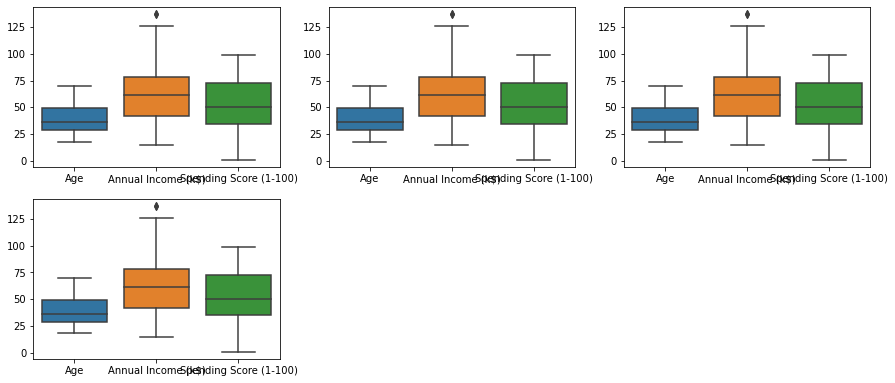

In [30]:
fig = plt.figure(figsize = (15, 10))
axes = 330

for num in col:
  axes += 1
  fig.add_subplot(axes)
  sns.boxplot(data=dataset1)

plt.show()

In [31]:
dataset1_cluster = pd.DataFrame()
dataset1_cluster['Age'] = dataset1['Age']
dataset1_cluster['Annual Income (k$)'] = dataset1['Annual Income (k$)']
dataset1_cluster['Spending Score (1-100)'] = dataset1['Spending Score (1-100)']
dataset1_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

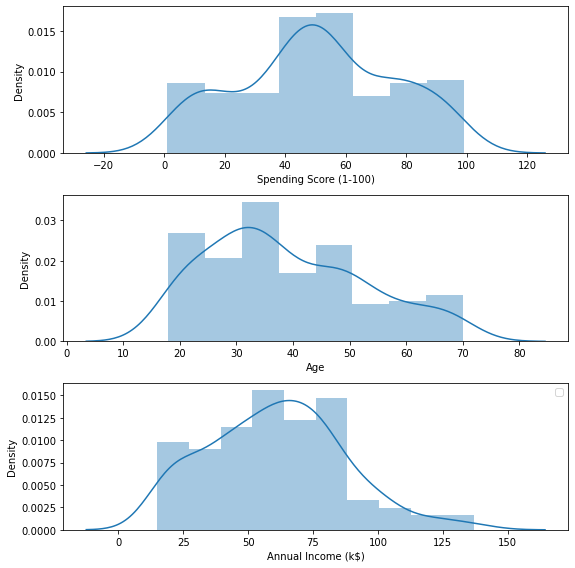

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))
sns.distplot(dataset1["Spending Score (1-100)"], ax=ax1)
sns.distplot(dataset1["Age"], ax=ax2)
sns.distplot(dataset1["Annual Income (k$)"], ax=ax3)
plt.tight_layout()
plt.legend()
plt.show()

In [33]:
dataset1_cluster_log = np.log(dataset1_cluster[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
dataset1_cluster_log

,Age,Annual Income (k$),Spending Score (1-100)
0,2.944439,2.708050,3.663562
1,3.044522,2.708050,4.394449
2,2.995732,2.772589,1.791759
3,3.135494,2.772589,4.343805
4,3.433987,2.833213,3.688879
...,...,...,...
195,3.555348,4.787492,4.369448
196,3.806662,4.836282,3.332205
197,3.465736,4.836282,4.304065
198,3.465736,4.919981,2.890372


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

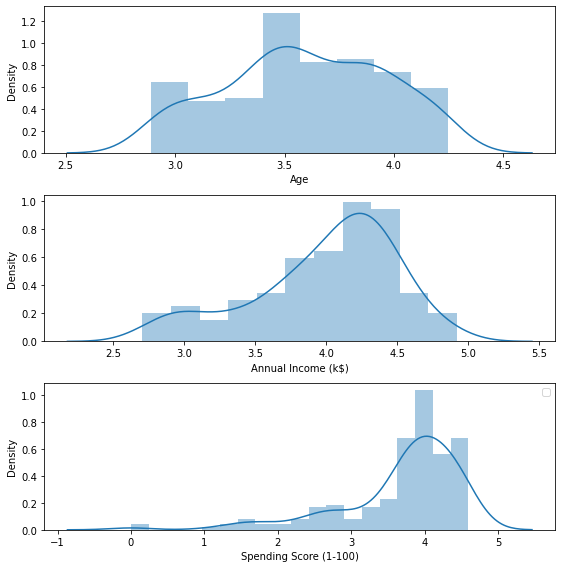

In [34]:
dataset1_cluster_log = np.log(dataset1_cluster[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))
sns.distplot(dataset1_cluster_log["Age"], ax=ax1)
sns.distplot(dataset1_cluster_log["Annual Income (k$)"], ax=ax2)
sns.distplot(dataset1_cluster_log["Spending Score (1-100)"], ax=ax3)
plt.tight_layout()
plt.legend()
plt.show()

In [35]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(dataset1_cluster_log)

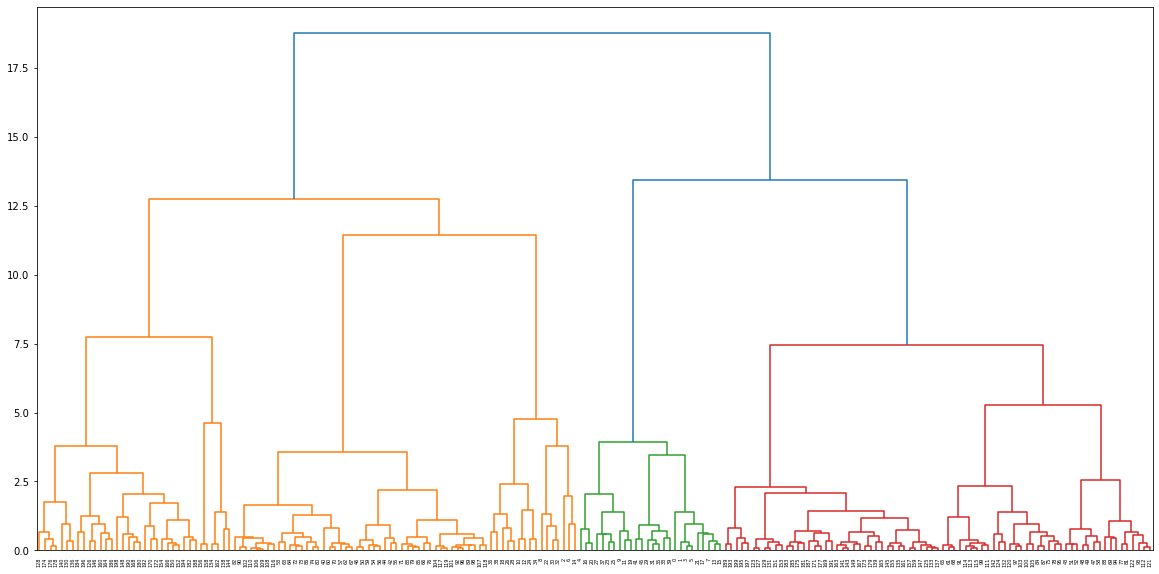

In [36]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))
plt.show()

Hierarchical Agglomerative Clustering


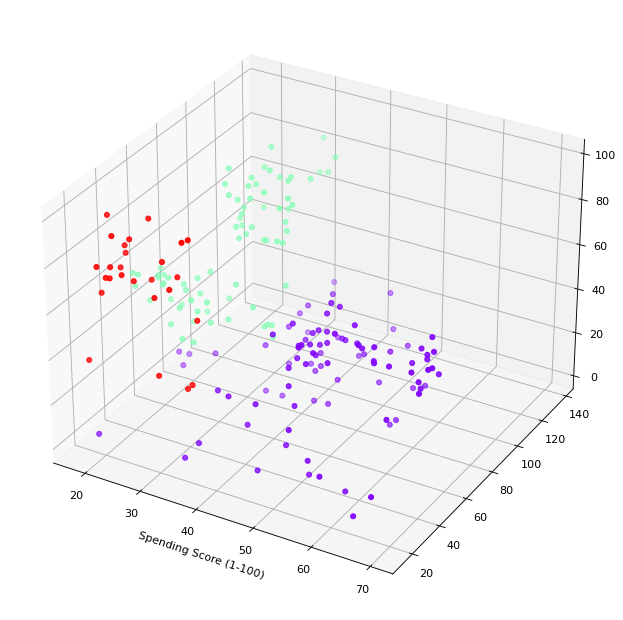

In [37]:
model = AgglomerativeClustering(n_clusters=3)
model.fit(cluster_scaled)
hac_labels = model.labels_
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(dataset1_cluster['Age'], dataset1_cluster['Annual Income (k$)'], dataset1_cluster['Spending Score (1-100)'], c=hac_labels, cmap='rainbow')
xlabel = ax.set_xlabel('Age', linespacing=3.2)
ylabel = ax.set_xlabel('Annual Income (k$)', linespacing=3.1)
zlabel = ax.set_xlabel('Spending Score (1-100)', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")
plt.show()

In [38]:
dataset1_clustered_hac = dataset1_cluster.assign(Cluster=hac_labels)
grouped_hac = dataset1_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,49.4,61.2,31.7
1,29.9,71.8,65.8
2,26.0,24.7,72.9


In [39]:
## Dataset kedua
dataset2 = pd.read_csv('data_banknote_authentication.csv')
dataset2.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [40]:
dataset2_scaled = normalize(dataset2)
dataset2_scaled = pd.DataFrame(dataset2_scaled, columns=dataset2.columns)
dataset2_scaled.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,0.465045,0.835525,-0.251515,-0.149573,0.0
1,0.763780,-0.521232,0.380152,0.021031,0.0
2,0.301268,0.829982,-0.349606,-0.313278,0.0
3,0.050902,-0.688796,0.706823,-0.152873,0.0
4,0.371440,0.822382,-0.336765,-0.268904,0.0


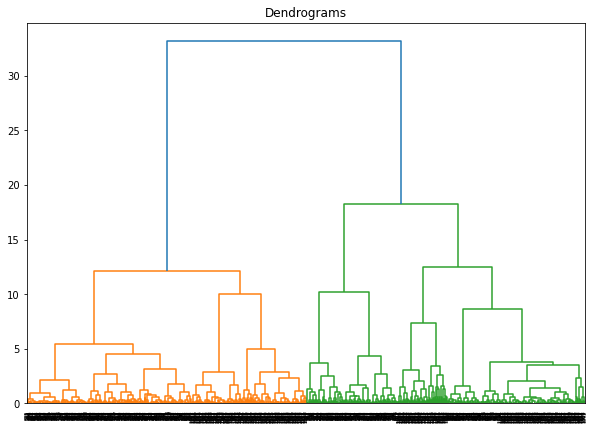

In [41]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(dataset2_scaled, method='ward'))

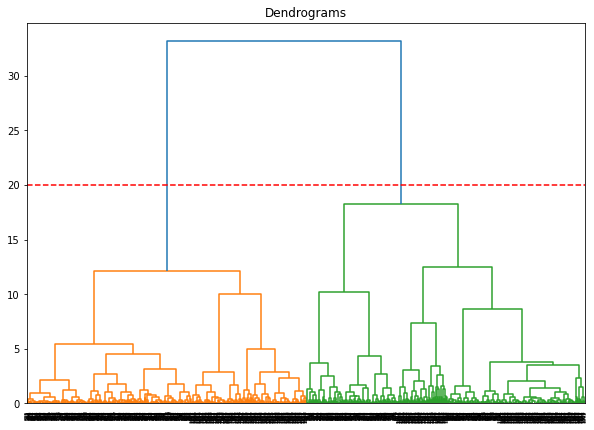

In [45]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(dataset2_scaled, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')

In [46]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset2_scaled)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

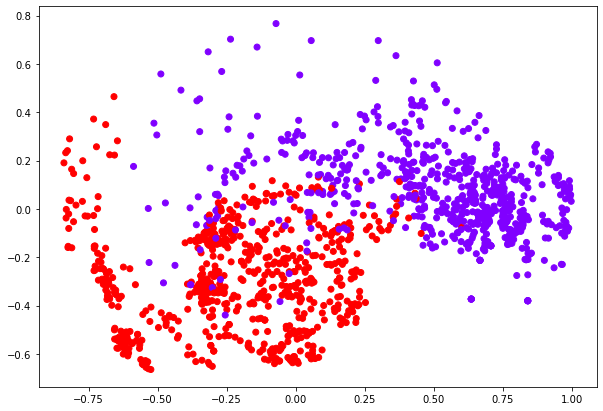

In [47]:
plt.figure(figsize=(10, 7))
plt.scatter(dataset2_scaled['-2.8073'], dataset2_scaled['-0.44699'], c=cluster.labels_, cmap='rainbow')

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Pada barplot pertama: bisa diliat Female lebih banyak, jumlah prang yang berumur 18-40 lebih banyak dibanding range umur setelah itu, annual income umur 50 dan 78 paling tinggi, dan spending score yang berumur di daerah median itu yang paling banyak.
    - Pada heatmap, korelasi yang paling baik itu annual income dengan spending score.
    - distribusi plot database pertama menunjukkan kalau dataset itu terdistribusi secara normal
    - Pada hierarchical clustering dapat diketahui: cluster 0= agenya paling tinggi, cluster 1= annual income paling tinggi, cluster 2= spending score paling tinggi
    - Pada dendogram memakai dataset ke2, mendapatkan treshold di y=20 untuk mendapatkan 2 cluster. Pada visualisasinya terlihat ada beberapa spot yang bertabrakan

In [ ]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Fernando Khorasani
NIM: 	43088
Time-stamp:	2022-11-16 20:47:50.884422


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [26]:
!jupyter nbconvert --to html "./IF540_BL_43088_FernandoKhorasani_Week10.ipynb" --output-dir="./"

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern './IF540_BL_43088_FernandoKhorasani_Week10.ipynb' matched no files


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#